In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

### Задаем глобальные переменные

In [2]:
N = 5
d = 2
p_back = 1.0/3
probArr = [0]*(N+2+1)
probArr[d] = 1

Пояснения

probArr - массив, показывающий вероятность нахождения пьяницы на каждом расстоянии от обрыва, probArr[0] - упал, заполняем нулями

probArr[d] - равен единице, так как сначала пьяница точно находится в 2 шагах от обрыва

Кстати! Attention! Я до последнего ищу вероятности летального исхода, а не выживания

### Собственно, сама функция

#### Правда она возвращает массив, а не число, но сорре

In [3]:
def pyan(probArr, pBack, steps, distance):
    #новый массив, в который будем расчитывать новые вероятности, инициализируем нулями
    arrNew = [0]*(steps + distance + 1)
    arrNew[0] = probArr[0]
    
    pForward = 1-pBack  #вероятность пойти вперед
    
    for i in range(0, len(probArr)):
        #обновляем текущий массив с учетом в-ти движения вперед
        if i > 1:  #i > 1, т.к. из обрыва вперед пути нет
            arrNew[i] = arrNew[i]  +  probArr[i-1]*pForward
            
        #обновляем текущий массив с учетом вероятности движения назад, 
        #i < len(probArr)-1, чтобы не адресоваться к несуществующему индексу
        if i < len(probArr)-1:
            arrNew[i] = arrNew[i]  +  probArr[i+1]*pBack
            
    return arrNew

### Вероятность выжить на 5 шаге

In [4]:
for i in range(1,N):
    probArr = pyan(probArr, p_back, N, d)
print(1 - probArr[0])

0.8395061728395061


### Давайте создадим ван мор массивчик

In [5]:
varray = [] #массив для визуализации
N = 100
probArr = [0]*(N+2+1) 
probArr[d] = 1

for i in range(0,N):
    probArr = pyan(probArr, p_back, N, d)
    varray.append(1 - probArr[0])

### Вероятность выжить на 5 шаге другим способом

In [6]:
varray[4]

0.8395061728395061

### Рисуем график

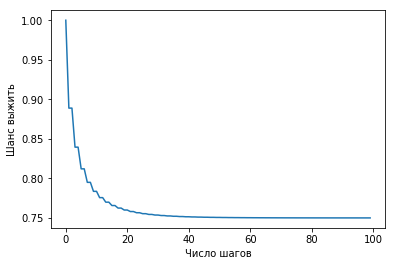

In [7]:
plt.plot(varray)
plt.ylabel('Шанс выжить')
plt.xlabel('Число шагов')
plt.show()